<a href="https://colab.research.google.com/github/KondapiPraveen/Machine-Learning-Project/blob/master/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1.1 Importing Libraries**
 1. Numpy for numerical computations
 2. Pandas for DataFrame Manipulation
 3. Matplotlib for Visulalizations 

In [112]:
# Loading csv data 
data = pd.read_csv('/content/sample_data/data.csv')

In [113]:
# Data Overview by printing head of data
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


**1.2 Checking DataTypes, Null values and Shape**

Get to know the size of DataFrame and datatypes of data and count values of data in each column <br>
Number of null values can be seen

In [114]:
print(data.shape)
data.info()

(11914, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64

Data Size : Rows = 11914, Columns = 16 <br>
There are some missing values in Engine Fuel Type, Engine HP, Engine Cylinders, Number of Doors, Market Category. <br> 
Market Category, Year are of less priority for estimating the price of car. And other features will be excluded later on analysis.<br>
There are so many classification for single entry in Market Category. It is not feasible to use Market Catefoty for estimation.<br>
Price of a car mostly depends its features not on the year.



**1.3 Summary Statistics**
<br>
Summary Statistics of the data

In [115]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


**STEP 3 : Renaming Columns**
  1. Engine HP => HP
  2. Engine Cylinders => Cylinders
  3. Transmission Type => Transmission
  4. Driven_Wheels => Drive Mode
  5. highway MPG => MPG-H
  6. city MPG => MPG-C
  7. MSRP => Price <br>
  STEP 2 is done later

In [116]:
data.rename(columns={"Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Transmission","Driven_Wheels":"Drive Mode","highway MPG":"MPG-H","city mpg":"MPG-C","MSRP":"Price"},inplace = True)
data

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


***STEP 2 : Data Cleaning***
1. Find the appropriate statistical data to replace. <br>
For now, Market Category column will be dropped <br>
Some other columns are not useful for estimation but will be kept, In making the model only useful information will be used.<br>
Year is also not useful for estimating price. <br> 
Later correlation matrix and relationship between variables can be seen throught visualizations. 


In [117]:
data.drop(columns="Market Category")

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


**4.1 Duplicate Data Points**
1. It can be seen after removing Marketing Category there are 715 duplicate rows. Keeping first data entry intact
2. Next, we dropped the duplicate entries keeping the first one entry.

In [118]:
print(data.duplicated(keep='first').value_counts())
data.drop_duplicates(keep='first',inplace=True)

False    11199
True       715
dtype: int64


In [119]:
Fuel_mode = data["Engine Fuel Type"].mode().values[0]
Hp_med = data["HP"].median()
Cy_mode = data["Cylinders"].mode().values[0]
tr_mode = data["Transmission"].mode().values[0]
nd_mode = data["Number of Doors"].mode().values[0]

**4.2 Imputing Data**
1. Fuel Type is categorical so the most frequent value is chosen for replacement
2. HP is numerical but for robust analysis median is chosen, so outliers don't effect.
3. Cylinders is numerical but by intuation choosing most frequent value is clear.
4. Transmission and Number of doors follow most frequent values is obvious

For some missing numerical values median and mean are close to each other. For some mode is choosen to make more sense 


In [120]:
data["Engine Fuel Type"].fillna(Fuel_mode,inplace=True)
data["HP"].fillna(Hp_med,inplace=True)
data["Cylinders"].fillna(Cy_mode,inplace=True)
data["Transmission"].fillna(tr_mode,inplace=True)
data["Number of Doors"].fillna(nd_mode,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11199 non-null  object 
 1   Model             11199 non-null  object 
 2   Year              11199 non-null  int64  
 3   Engine Fuel Type  11199 non-null  object 
 4   HP                11199 non-null  float64
 5   Cylinders         11199 non-null  float64
 6   Transmission      11199 non-null  object 
 7   Drive Mode        11199 non-null  object 
 8   Number of Doors   11199 non-null  float64
 9   Market Category   7823 non-null   object 
 10  Vehicle Size      11199 non-null  object 
 11  Vehicle Style     11199 non-null  object 
 12  MPG-H             11199 non-null  int64  
 13  MPG-C             11199 non-null  int64  
 14  Popularity        11199 non-null  int64  
 15  Price             11199 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memor

**STEP 5 : Checking and Removing Outliers** <br>
1. A boxplot will be plotted for price to visualiza outliers.
2. Outliers are identified by Q1 - 1.5\*IQR and Q3 + 1.5\*IQR
3. These outliers are removed and once again summary statistics and boxplot will be plotted

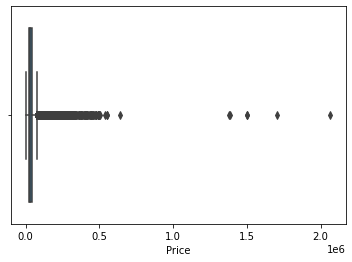

In [121]:
# Boxplot for prices
import seaborn as sns
sns.boxplot(x=data["Price"])

In [122]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
print(IQR)
data2 = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]
data2.shape

Year                   9.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1460.0
Price              21433.0
dtype: float64


(8642, 16)

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
count,8642.000000,8642.000000,8642.000000,8642.000000,8642.000000,8642.000000,8642.000000,8642.000000
mean,2011.297038,235.580537,5.390072,3.543046,26.664082,19.417380,1208.223444,30986.382897
std,6.301536,77.529727,1.387616,0.825085,5.673848,4.346383,863.642194,15130.993847
min,1994.000000,66.000000,3.000000,2.000000,13.000000,10.000000,21.000000,2000.000000
25%,2008.000000,172.000000,4.000000,4.000000,23.000000,16.000000,549.000000,21946.250000
50%,2015.000000,230.000000,6.000000,4.000000,26.000000,19.000000,1013.000000,29982.500000
75%,2016.000000,290.000000,6.000000,4.000000,31.000000,22.000000,1851.000000,39995.000000
max,2017.000000,485.000000,8.000000,4.000000,42.000000,31.000000,3916.000000,75010.000000


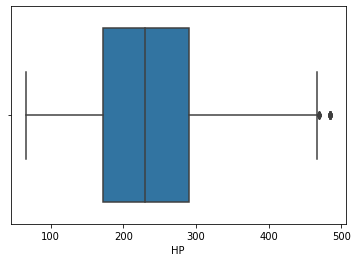

In [123]:
sns.boxplot(x=data2["HP"])
data2.describe()

**STEP 6 : Average Price of Top 10 Represented Brands**
1. Top 10 car Makers are listed
2. Car Makers are grouped and average price of their cars are computed

In [124]:
Top = data2["Make"].value_counts()[:10].index
print(Top)

Index(['Chevrolet', 'Toyota', 'Volkswagen', 'Nissan', 'GMC', 'Dodge', 'Mazda',
       'Honda', 'Suzuki', 'Infiniti'],
      dtype='object')


In [125]:
Price_mean = data2[["Make","Price"]].groupby(["Make"]).mean()
Top_mean = Price_mean.filter(items=Top,axis=0)
Top_mean.sort_values("Price",ascending=False)

,Price
Make,
Infiniti,43127.822981
GMC,33261.400853
Volkswagen,29032.817476
Toyota,29022.944620
Nissan,28352.543860
Chevrolet,28207.045499
Honda,27381.364611
Dodge,26076.722353
Mazda,20830.670025
